In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [51]:
mydata=pd.read_csv('nasa.csv')
mydata.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219878,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2458161.642,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2457902.337,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219878,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2457814.455,135.142133,0.726395,J2000,True


In [52]:
print("Basic Statistics")
print(mydata.describe())


Basic Statistics
       Neo Reference ID          Name  Absolute Magnitude  Est Dia in KM(min)  \
count      4.687000e+03  4.687000e+03         4687.000000         4687.000000   
mean       3.272298e+06  3.272298e+06           22.267865            0.204604   
std        5.486011e+05  5.486011e+05            2.890972            0.369573   
min        2.000433e+06  2.000433e+06           11.160000            0.001011   
25%        3.097594e+06  3.097594e+06           20.100000            0.033462   
50%        3.514799e+06  3.514799e+06           21.900000            0.110804   
75%        3.690060e+06  3.690060e+06           24.500000            0.253837   
max        3.781897e+06  3.781897e+06           32.100000           15.579552   

       Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  \
count         4687.000000        4687.000000        4687.000000   
mean             0.457509         204.604203         457.508906   
std              0.826391         369.573402        

In [55]:
print(mydata.corr(numeric_only=True))

                              Neo Reference ID      Name  Absolute Magnitude  \
Neo Reference ID                      1.000000  1.000000            0.602381   
Name                                  1.000000  1.000000            0.602381   
Absolute Magnitude                    0.602381  0.602381            1.000000   
Est Dia in KM(min)                   -0.499821 -0.499821           -0.613482   
Est Dia in KM(max)                   -0.499821 -0.499821           -0.613482   
Est Dia in M(min)                    -0.499821 -0.499821           -0.613482   
Est Dia in M(max)                    -0.499821 -0.499821           -0.613482   
Est Dia in Miles(min)                -0.499821 -0.499821           -0.613482   
Est Dia in Miles(max)                -0.499821 -0.499821           -0.613482   
Est Dia in Feet(min)                 -0.499821 -0.499821           -0.613482   
Est Dia in Feet(max)                 -0.499821 -0.499821           -0.613482   
Epoch Date Close Approach             0.

In [56]:
def create_distribution(mydata):
    plt.figure(figsize=(10, 6))
    plt.hist(mydata['Est Dia in KM(max)'], bins=30, color='skyblue', edgecolor='black')
    plt.title('Distribution of Asteroid Sizes')
    plt.xlabel('Diameter (KM)')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.savefig('size_distribution.png')
    plt.show()
    plt.close()


In [57]:
def create_velocityscatter(mydata):
    plt.figure(figsize=(10, 6))
    plt.scatter(mydata['Relative Velocity km per sec'],mydata['Miss Dist.(kilometers)'] / 1000000, alpha=0.5)
    plt.title('Asteroid Velocity vs Miss Distance')
    plt.xlabel('Velocity (km/s)')
    plt.ylabel('Miss Distance (million km)')
    plt.tight_layout()
    plt.savefig('velocity_scatter.png')
    plt.show()
    plt.close()

In [58]:
def create_hazardheatmap(mydata):
    columnsentries = ['Est Dia in KM(max)', 'Relative Velocity km per sec', 
              'Miss Dist.(kilometers)', 'Absolute Magnitude']
    correlation = mydata[columnsentries].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation among Characteristics of Astroids')
    plt.tight_layout()
    plt.savefig('correlation_heatmap.png')
    plt.show()
    plt.close()

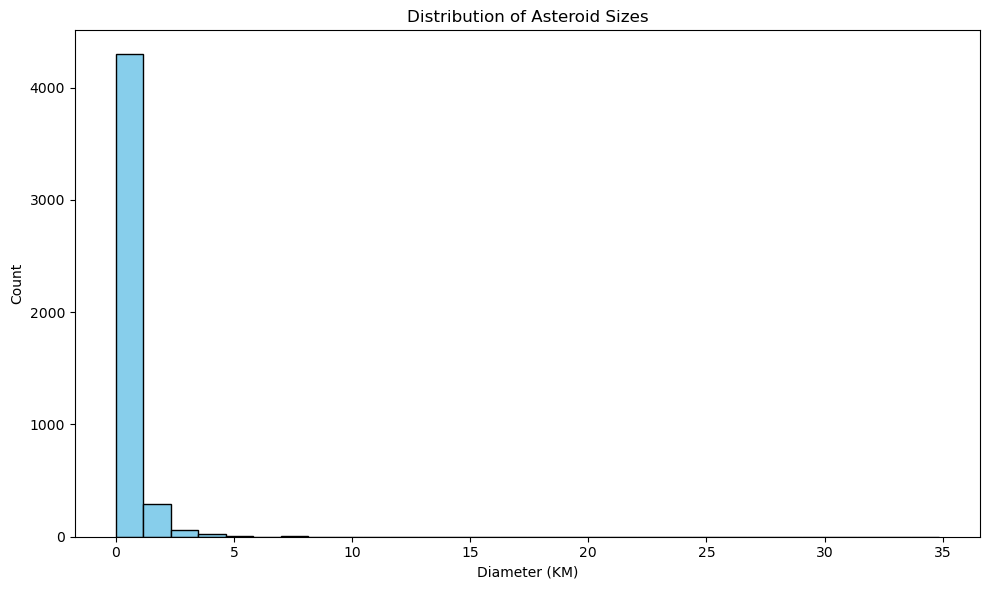

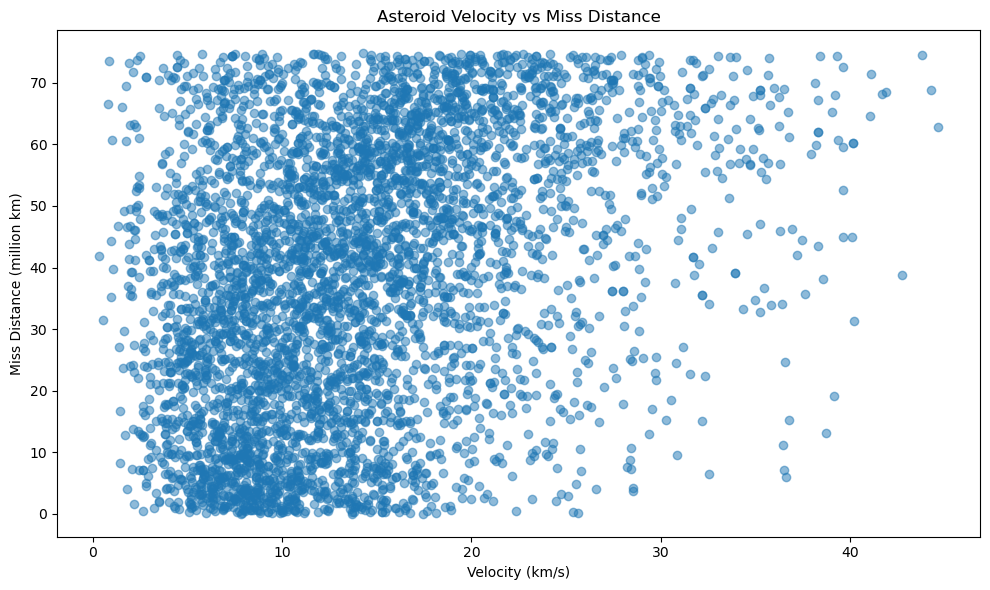

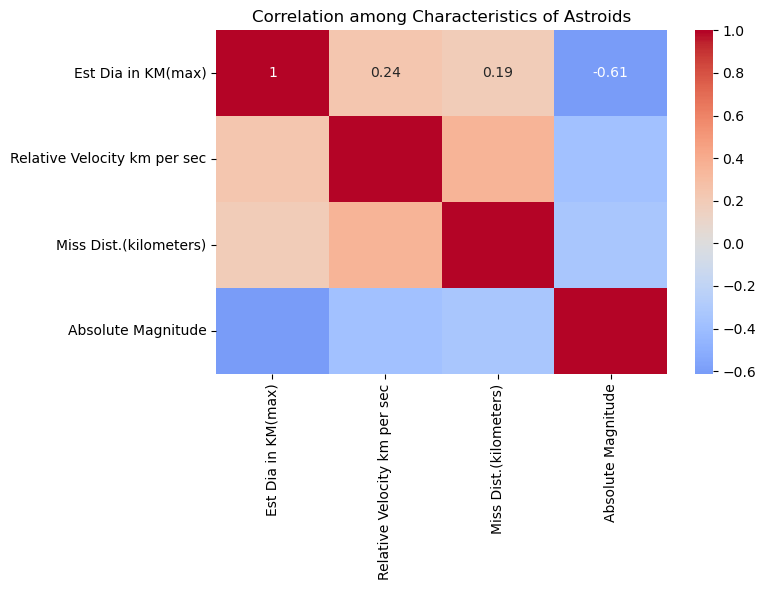

In [59]:
    create_distribution(data)
    create_velocityscatter(data)
    create_hazardheatmap(data)

In [60]:
print("\nBasic Statistics:")
statstics = mydata[['Est Dia in KM(max)', 'Relative Velocity km per sec', 'Miss Dist.(kilometers)']].describe()
print(statstics)
print("\nCorrelation Matrix:")
corrmat = mydata[['Est Dia in KM(max)', 'Relative Velocity km per sec', 
                 'Miss Dist.(kilometers)']].corr()
print(corrmat)
hazard_count = data['Hazardous'].value_counts()
print("\nHazardous vs Non-Hazardous Asteroids:")
print(hazard_count)


Basic Statistics:
       Est Dia in KM(max)  Relative Velocity km per sec  \
count         4687.000000                   4687.000000   
mean             0.457509                     13.970811   
std              0.826391                      7.293223   
min              0.002260                      0.335504   
25%              0.074824                      8.432865   
50%              0.247765                     12.917889   
75%              0.567597                     18.077649   
max             34.836938                     44.633747   

       Miss Dist.(kilometers)  
count            4.687000e+03  
mean             3.841347e+07  
std              2.181110e+07  
min              2.660989e+04  
25%              1.995928e+07  
50%              3.964771e+07  
75%              5.746863e+07  
max              7.478160e+07  

Correlation Matrix:
                              Est Dia in KM(max)  \
Est Dia in KM(max)                      1.000000   
Relative Velocity km per sec        